# Main Title

# Preliminaries

## Imports

In [1]:
import os
import sys
import numpy as np
import pprint


from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = dirname(os.getcwd())
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus import Morpheus
from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

# Visuals
from morpheus.graph import to_dot
from morpheus.visuals import show_diagram
from morpheus.graph.network import *

from morpheus.composition import o as ω
from morpheus.composition import x as χ

# Ipython things
from IPython.display import Image, display
from IPython.core.display import HTML 

pp = pprint.PrettyPrinter(indent=4)

## Methods

## General Variables

In [2]:
np.where([True,True, False])[0]

array([0, 1])

# Prepare sandbox

Train a morpheus on a dataset and extract an interesting composite model.


                We have selected    1 model(s) 
                at threshold:       0.30
                with model ids:     [{'f-79'}]
                


                We have selected    2 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-22'}, {'f-49'}]
                


                We have selected    1 model(s) 
                at threshold:       1.00
                with model ids:     [{'f-43'}]
                


                We have selected    3 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-15'}, {'f-60'}, {'f-73'}]
                

AVL DESC: {3, 4}
AVL DESC: {1, 3, 4}
AVL DESC: {0, 1, 2, 3, 4}
AVL DESC: {0, 1, 2, 3, 4, 7}
dict_keys(['I(d-00)', 'd-04', 'd-03'])
dict_keys(['I(d-00)', 'd-04', 'd-03', 'f-79', 'd-01'])
dict_keys(['I(d-00)', 'd-04', 'd-03', 'f-79', 'd-01', 'f-22', 'd-02'])
dict_keys(['I(d-00)', 'd-04', 'd-03', 'f-79', 'd-01', 'f-22', 'd-02', 'f-43', 'd-07'])
dict_k

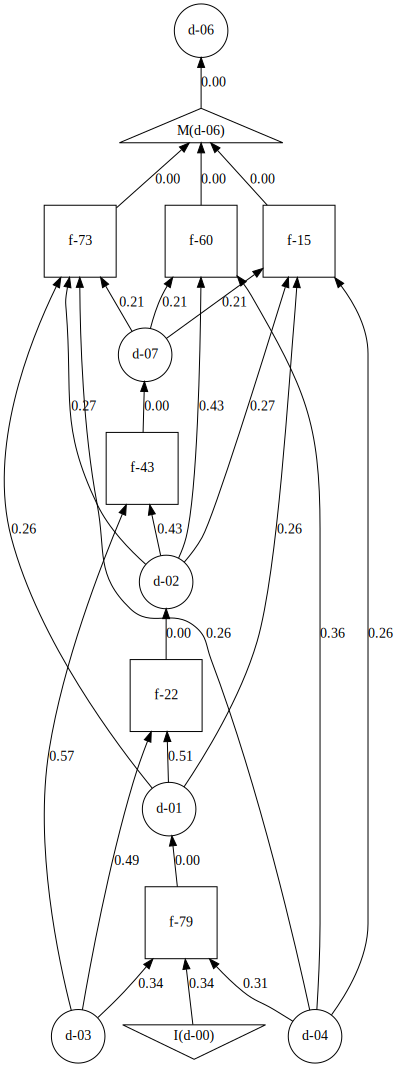

In [3]:
m = Morpheus(random_state=802,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_targets=1,
             nb_iterations=10,
             fraction_missing=0.4,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values[:, [0,1]], q_code=np.array([-1,-1,-1,0,0,-1,1,1]))
m.show_q_diagram(fi=True)

In [4]:
class CompositeModel(object):
    def __init__(self, diagram, predict):
        self.desc_ids = list(get_ids(diagram, kind='desc'))
        self.targ_ids = list(get_ids(diagram, kind='targ'))
        self.feature_importances_ = self.extract_feature_importances(diagram)
        
        self.predict = predict
        return
    
    def extract_feature_importances(self, diagram, aggregation=np.sum):
        fi = []
        for idx in self.desc_ids :
            fi_idx = [d.get('fi', 0) 
                      for src, tgt, d in diagram.edges(data=True) 
                      if d.get('idx', 0)==idx]
            fi.append(aggregation(fi_idx))
            
        norm = np.linalg.norm(fi, 1)
        fi = fi/norm
        return fi

In [29]:
diagram = m.q_diagram
predict = m.q_predict

composi = CompositeModel(diagram, predict)
composi.feature_importances_

array([0.43472895, 0.56527105])

In [ ]:
model_to_graph(CompositeModel)

In [27]:
m.predict(np.random.rand(15,6))

AssertionError: 